In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import validation_curve

In [198]:
# Realizando a leitura do arquivo csv (dataframe)
dataframe = pd.read_csv('data.csv', index_col=False)

In [199]:
dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [200]:
#Vendo informações do dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [201]:
#Vendo colunas do dataset
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [202]:
#Removendo colunas que não são úteis para o desenvolvimento
dataframe.drop(['id', "Unnamed: 32"], axis=1, inplace=True)

In [203]:
dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [204]:
# Normalizando os dados
scaler_radius_mean = MinMaxScaler()
dataframe['radius_mean'] = scaler_radius_mean.fit_transform(dataframe['radius_mean'].values.reshape(-1, 1))

scaler_texture_mean = MinMaxScaler()
dataframe['texture_mean'] = scaler_texture_mean.fit_transform(dataframe['texture_mean'].values.reshape(-1, 1))

scaler_perimeter_mean = MinMaxScaler()
dataframe['perimeter_mean'] = scaler_perimeter_mean.fit_transform(dataframe['perimeter_mean'].values.reshape(-1, 1))

scaler_area_mean = MinMaxScaler()
dataframe['area_mean'] = scaler_area_mean.fit_transform(dataframe['area_mean'].values.reshape(-1, 1))

scaler_radius_se = MinMaxScaler()
dataframe['radius_se'] = scaler_radius_se.fit_transform(dataframe['radius_se'].values.reshape(-1, 1))

scaler_texture_se = MinMaxScaler()
dataframe['texture_se'] = scaler_texture_se.fit_transform(dataframe['texture_se'].values.reshape(-1, 1))

scaler_perimeter_se = MinMaxScaler()
dataframe['perimeter_se'] = scaler_perimeter_se.fit_transform(dataframe['perimeter_se'].values.reshape(-1, 1))

scaler_area_se = MinMaxScaler()
dataframe['area_se'] = scaler_area_se.fit_transform(dataframe['area_se'].values.reshape(-1, 1))

scaler_radius_worst = MinMaxScaler()
dataframe['radius_worst'] = scaler_radius_worst.fit_transform(dataframe['radius_worst'].values.reshape(-1, 1))

scaler_texture_worst = MinMaxScaler()
dataframe['texture_worst'] = scaler_texture_worst.fit_transform(dataframe['texture_worst'].values.reshape(-1, 1))

scaler_perimeter_worst = MinMaxScaler()
dataframe['perimeter_worst'] = scaler_perimeter_worst.fit_transform(dataframe['perimeter_worst'].values.reshape(-1, 1))

scaler_area_worst = MinMaxScaler()
dataframe['area_worst'] = scaler_area_worst.fit_transform(dataframe['area_worst'].values.reshape(-1, 1))

In [205]:
#Dividindo os dados em features (x) e target (y)
x = dataframe.drop('diagnosis', axis=1)
y = dataframe['diagnosis']

In [206]:
#Dividindo dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

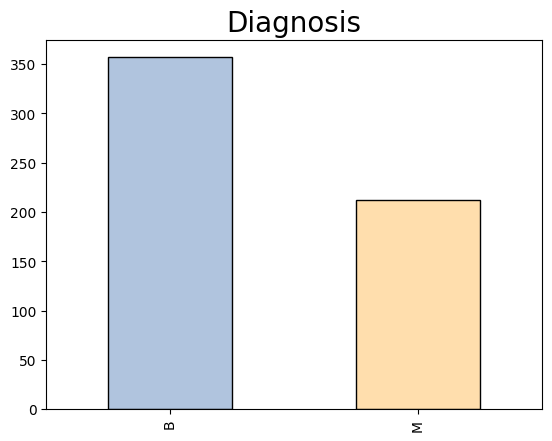

In [207]:
dataframe['diagnosis'].value_counts().plot(kind='bar',edgecolor='black',color=['lightsteelblue','navajowhite'])
plt.title("Diagnosis",fontsize=20)
plt.show()

<ipython-input-208-4a49ed414292>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.corr()


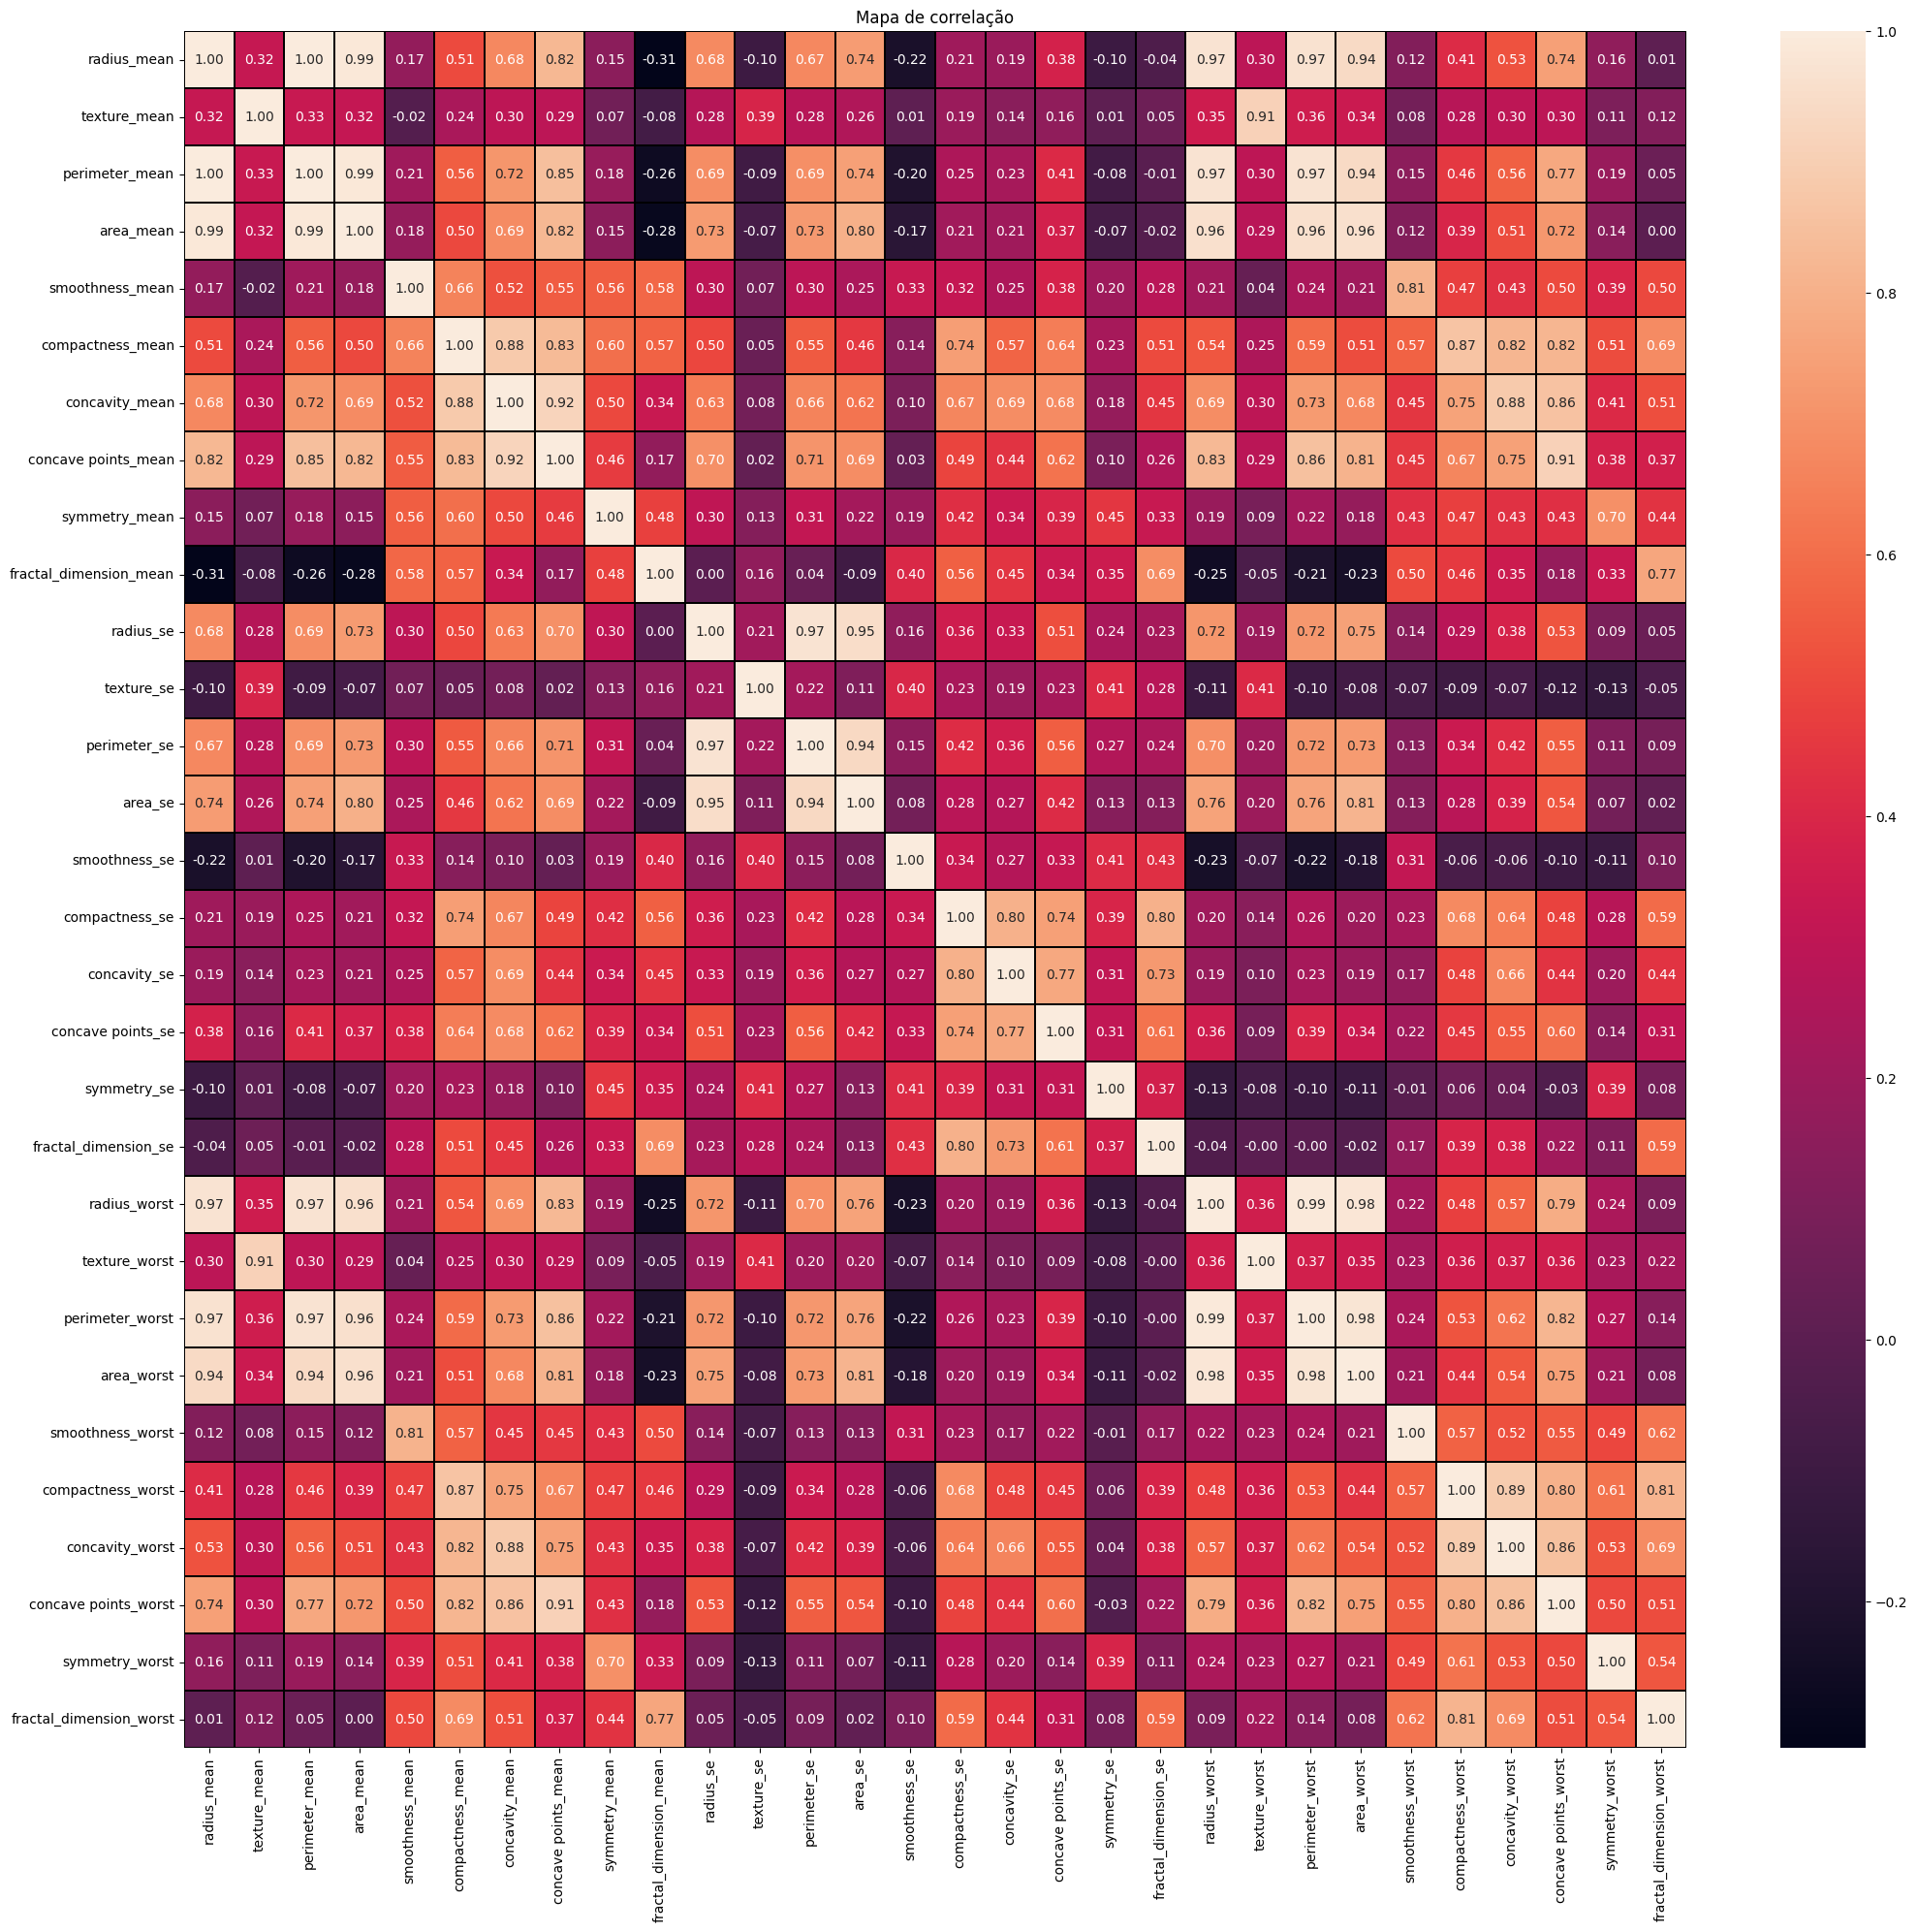

In [208]:
# Plotando heatmap de correlação entre as informações
cor = dataframe.corr()
plt.figure(figsize=(25,23))
sns.heatmap(cor, annot= True, linewidths= 0.3 ,linecolor = "black", fmt = ".2f")
plt.title('Mapa de correlação')
plt.show()

In [213]:
# Modelos
svc_model = {
    'name': 'SVC',
    'model': SVC(),
    'params': {
        "gamma": [0.001, 0.01, 0.1, 1],
        'C': [1, 10, 50, 100, 200, 300, 1000],
        'kernel': ['rbf'],
    }
}

knn_model = {
    'name': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
    'params': {
        'n_neighbors': [2, 3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        "metric": ["euclidean", "manhattan"]
    }
}

decision_tree_model = {
    'name': 'DecisionTreeClassifier',
    'model': DecisionTreeClassifier(),
    'params': {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'min_samples_split': [2,5,10],
          'min_samples_leaf': [1,5,10]}
}

# Definindo a métrica desejada
desired_metric = 'accuracy'

# Função para treinar e avaliar um modelo
def train_and_evaluate_model(model_info, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1, scoring=desired_metric)
    grid_search.fit(x_train, y_train)

    best_model_info = {
        'name': model_info['name'],
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    y_pred = grid_search.predict(x_test)
    classification_rep = classification_report(y_test, y_pred)
    best_model_info['classification_report'] = classification_rep

    return best_model_info


def print_results(result):
    print(f"\nModelo: {result['name']}")
    print(f"Melhores parâmetros: {result['best_params']}")
    print(f"Melhor {desired_metric.capitalize()}: {round(result['best_score'] * 100, 2)}%")
    print("Relatório de classificação:")
    print(result['classification_report'])

svc_result = train_and_evaluate_model(svc_model, x_train, y_train, x_test, y_test)
knn_result = train_and_evaluate_model(knn_model, x_train, y_train, x_test, y_test)
decision_tree_result = train_and_evaluate_model(decision_tree_model, x_train, y_train, x_test, y_test)

results = [svc_result, knn_result, decision_tree_result]

# Printar os resultados
for result in results:
    print_results(result)



Modelo: SVC
Melhores parâmetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Melhor Accuracy: 98.02%
Relatório de classificação:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Modelo: KNeighborsClassifier
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Melhor Accuracy: 96.48%
Relatório de classificação:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Modelo: DecisionTreeClassifier
Melhores parâmetros: {

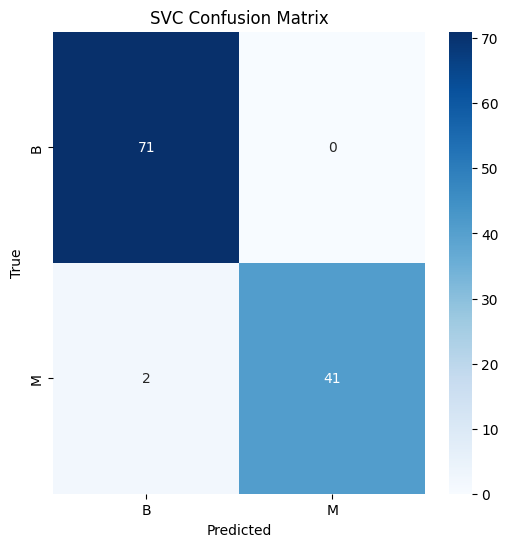

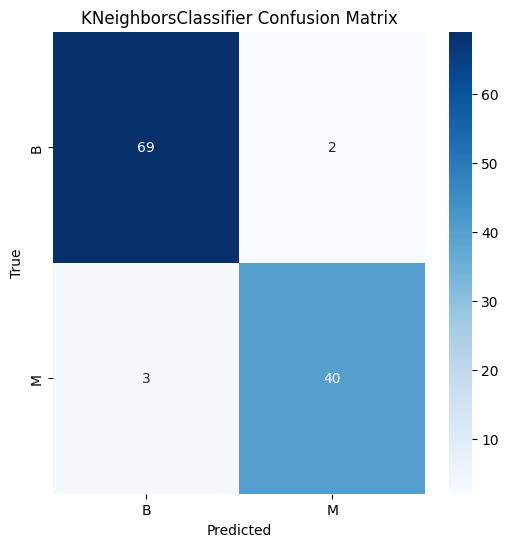

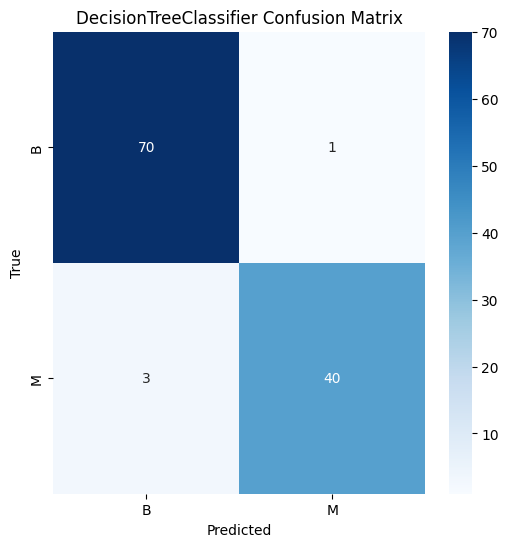

In [210]:
# Função para plotar a matriz de confusão
def plot_confusion_matrix_heatmap(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


# Plotar a matriz de confusão para cada modelo
plot_confusion_matrix_heatmap(svc_result['best_model'], x_test, y_test)
plot_confusion_matrix_heatmap(knn_result['best_model'], x_test, y_test)
plot_confusion_matrix_heatmap(decision_tree_result['best_model'], x_test, y_test)